In [3]:
# new FITS file, including the updated cutout WCS.
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.utils.data import download_file
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import numpy as np
import skimage.registration as skf


In [4]:


# Load the image and the WCS
mosaic_hdu = fits.open('mosaic.fits')[0]
stacked_4 = fits.open('stacked_4.fits')[0]
wcs = WCS(mosaic_hdu.header)

# Make the cutout, including the WCS
cutout = Cutout2D(mosaic_hdu.data, position=(1192.4,1317.5), size=(1025,1024), wcs=wcs)


# Update the FITS header with the cutout WCS
#stacked_6.data = np.flipud(stacked_6.data)

stacked_4.header.update(cutout.wcs.to_header())
# Write the cutout to a new FITS file
cutout_filename = 'stacked_correct_4.fits'
stacked_4.writeto(cutout_filename, overwrite=True)


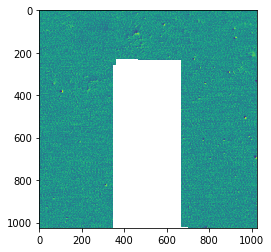

In [5]:
plt.imshow(np.arcsinh(cutout.data-stacked_4.data))

In [77]:
result, error, diffphase = skf.phase_cross_correlation(np.nan_to_num(cutout.data).astype('uint8'), np.nan_to_num(stacked_6.data).astype('uint8'))

In [78]:
result, diffphase

(array([0., 0.]), 2.5321660451511756e-19)

In [74]:
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)

In [81]:
mosaic_hdu = fits.open('mosaic.fits')[0]
denoised = denoise_tv_chambolle(mosaic_hdu.data, weight=0.1, multichannel=True)

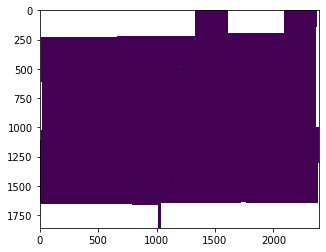

In [82]:
plt.imshow(denoised)

In [83]:
mosaic_hdu.data = denoised
mosaic_hdu.writeto('denoised.fits', overwrite=True)